# MONET-analysis dev 

First lets just import the driver to see how it happens and so we can play around with it a little 

In [1]:
import sys
sys.path.append('../../')
import driver

/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_default/lib/python3.6/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


Please install h5py to open files from the Amazon S3 servers.
Please install h5netcdf to open files from the Amazon S3 servers.


### Driver class

Now lets create an instance of the python driver analysis class. It consists of 4 main parts; model instances, observation instances, a paired instance of both.  This will allow us to move things around the plotting function for spatial and overlays and more complex plots.

In [2]:
an = driver.analysis()

If needed link files into one common directory to look at multiple days.

### Control File

set the yaml control file and begin by reading the file

In [3]:
an.control = '../yaml/control_cmaq-rrfs_surface-all-short_test_jupyter.yaml'
an.read_control() # control='control.yaml')
an.control_dict

{'analysis': {'start_time': '2019-08-01-12:00:00',
  'end_time': '2019-08-02-12:00:00',
  'output_dir': '/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surf_oper_rrfs_r131_v1/08_test/',
  'debug': True},
 'model': {'rrfs_r131v1': {'files': '/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surf_oper_rrfs_r131_v1/08/data/rrfs/*0801*dynf*.nc',
   'files_pm25': '/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surf_oper_rrfs_r131_v1/08/data/rrfs/*0801*pm25tot_f*.nc',
   'mod_type': 'rrfs',
   'mod_kwargs': {'mech': 'cb6r3_ae6_aq', 'surf_only': True},
   'radius_of_influence': 19500,
   'mapping': {'airnow': {'co': 'CO',
     'no2': 'NO2',
     'no': 'NO',
     'PM25_TOT': 'PM2.5',
     'o3': 'OZONE'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'dodgerblue', 'marker': 'D', 'linestyle': '-'}},
  'cmaq_oper': {'files': '/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surf_oper_rrfs_r131_v1/08/data/cmaq_oper/*0801*',
   'mod_type': 'cmaq',
   'mod_kwargs': {'concatenate_forecasts': True},
  

### Loading the model data 

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames.  Note it can open multiple files easily by including hot keys 

In [4]:
an.open_models()

rrfs_r131v1
{'files': '/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surf_oper_rrfs_r131_v1/08/data/rrfs/*0801*dynf*.nc', 'files_pm25': '/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surf_oper_rrfs_r131_v1/08/data/rrfs/*0801*pm25tot_f*.nc', 'mod_type': 'rrfs', 'mod_kwargs': {'mech': 'cb6r3_ae6_aq', 'surf_only': True}, 'radius_of_influence': 19500, 'mapping': {'airnow': {'co': 'CO', 'no2': 'NO2', 'no': 'NO', 'PM25_TOT': 'PM2.5', 'o3': 'OZONE'}}, 'projection': 'None', 'plot_kwargs': {'color': 'dodgerblue', 'marker': 'D', 'linestyle': '-'}}
/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surf_oper_rrfs_r131_v1/08/data/rrfs/*0801*dynf*.nc
[########################################] | 100% Completed |  3.6s
[########################################] | 100% Completed |  3.7s
[########################################] | 100% Completed |  3.8s
[########################################] | 100% Completed |  3.9s
[########################################] | 100% Completed |  0.6s
[##################

/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_default/lib/python3.6/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100

/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_default/lib/python3.6/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


In [5]:
#To help debug, you can print the models you incorporated
an.models

{'rrfs_r131v1': <driver.model at 0x7fbb51e80320>,
 'cmaq_oper': <driver.model at 0x7fbbe5806978>,
 'cmaq_expt': <driver.model at 0x7fbb71522828>}

In [6]:
#Update the name to one of the model names you used and you can print the object
an.models['cmaq_expt'].obj

<xarray.Dataset>
Dimensions:    (time: 24, x: 442, y: 265, z: 1)
Coordinates:
  * time       (time) datetime64[ns] 2019-08-01T13:00:00 ... 2019-08-02T12:00:00
    longitude  (y, x) float64 -120.6 -120.5 -120.4 ... -58.98 -58.83 -58.69
    latitude   (y, x) float64 21.89 21.92 21.95 21.97 ... 47.88 47.84 47.79
Dimensions without coordinates: x, y, z
Data variables: (12/21)
    CO         (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    NO         (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    NO2        (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    NOX        (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    NOY        (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    O3         (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    ...         ...
    PM25_SO4   (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    PM25_SOIL  (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    PM25_TOT   (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    PMC_TOT    (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    SO2        (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
    VOC        (time, z, y, x) float32 dask.array<chunksize=(24, 1, 265, 442), meta=np.ndarray>
Attributes: (12/35)
    IOAPI_VERSION:  $Id: @(#) ioapi library version 3.1 $                    ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2019216
    CTIME:          15159
    WDATE:          2019216
    ...             ...
    UPNAM:          csum            
    VAR-LIST:       O3              CO              NO              NO2      ...
    FILEDESC:                                                                ...
    HISTORY:        Mon Sep 27 16:11:32 2021: ncks -d TSTEP,0,23 aqm.20190801...
    NCO:            4.7.0
    proj4_srs:      +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=40.0 +lon_0=-97....

In [7]:
#All the info in the analysis class can also be called.
print(an.start_time)
print(an.end_time)
print(an.output_dir)

2019-08-01 12:00:00
2019-08-02 12:00:00
/scratch2/BMC/rcm1/rhs/fv3/regional/processed/surf_oper_rrfs_r131_v1/08_test/


### Open Obs

Now for monet-analysis we will open preprocessed data in either netcdf icartt or some other format.  We will not be retrieving data like monetio does for some observations (ie aeronet, airnow, etc....).  Instead we will provide utitilies to do this so that users can add more data easily.

Like models we list all obs objects in the yaml file and it will loop through and create driver.observation instances that include the model type, file, objects (i.e. data object) and label  

In [8]:
an.open_obs()

In [9]:
#All the info in the observation class can also be called.
an.obs['airnow'].obj

<xarray.Dataset>
Dimensions:     (time: 2163, x: 3790, y: 1)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 ... 3783 3784 3785 3786 3787 3788 3789
  * time        (time) datetime64[ns] 2019-08-01 ... 2019-08-31T00:30:00
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    siteid      (y, x) object ...
Dimensions without coordinates: y
Data variables: (12/30)
    BARPR       (time, y, x) float64 ...
    BC          (time, y, x) float64 ...
    CO          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO2         (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO2Y        (time, y, x) float64 ...
    ...          ...
    cmsa_name   (y, x) float64 ...
    msa_code    (y, x) float64 ...
    msa_name    (y, x) object ...
    state_name  (y, x) object ...
    epa_region  (y, x) object ...
    time_local  (time, y, x) datetime64[ns] ...
Attributes:
    title:         
    format:        NetCDF-4
    date_created:  2021-06-07

In [10]:
#This pairs the data
an.pair_data()

[########################################] | 100% Completed | 11.1s
[########################################] | 100% Completed | 11.2s
[########################################] | 100% Completed | 11.3s
[########################################] | 100% Completed | 11.4s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.7s


Reference std: 280.8085194614225
Reference std: 8.282009757088371
Reference std: 10.7437811451812
Reference std: 8.16234098325183
Reference std: 17.374055615507505


/scratch2/BMC/rcm1/rhs/MONET/monet/monet/plots/mapgen.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=figsize, subplot_kw={"projection": crs})


[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  2.8s
[########################################] | 100% Completed |  2.9s
[########################################] | 100% Completed |  3.0s
[########################################] | 100% Completed |  3.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100

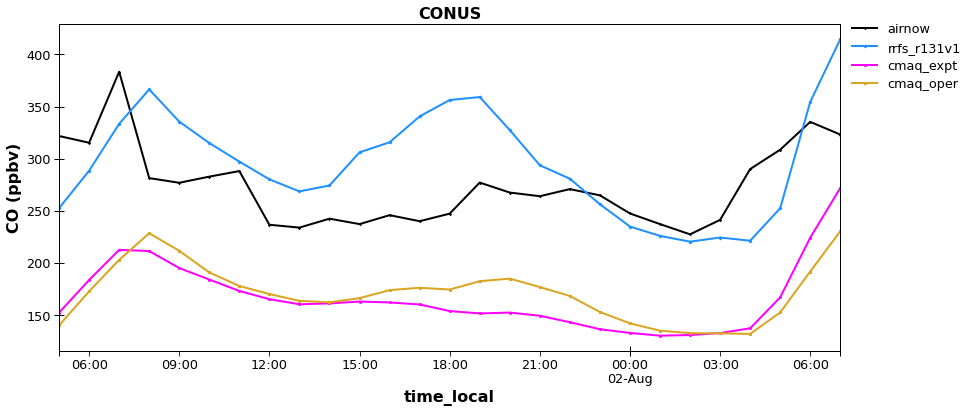

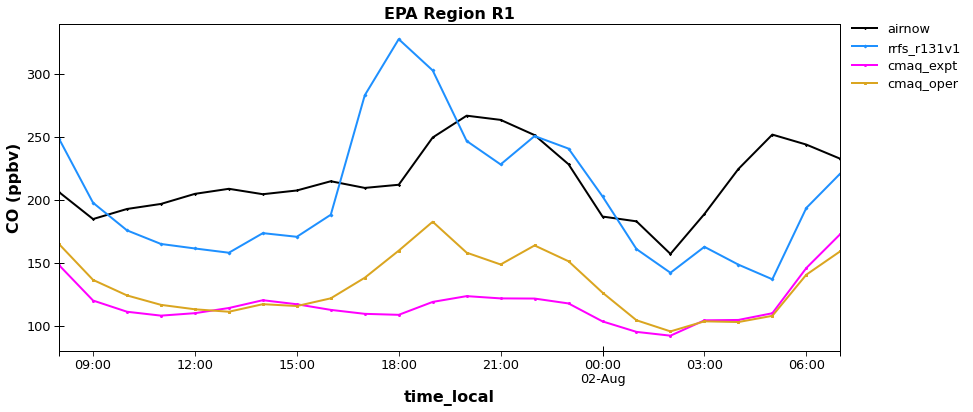

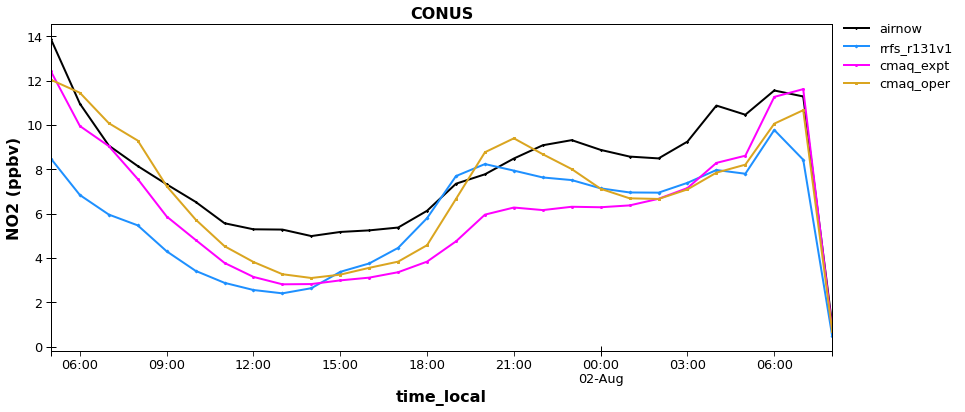

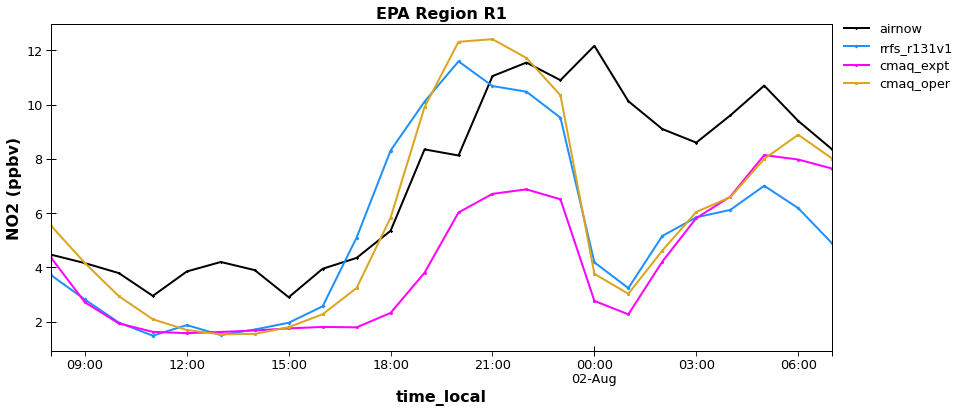

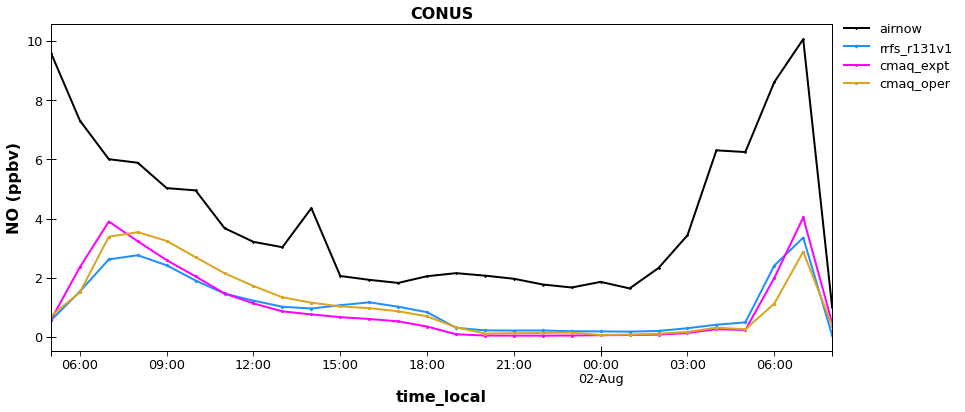

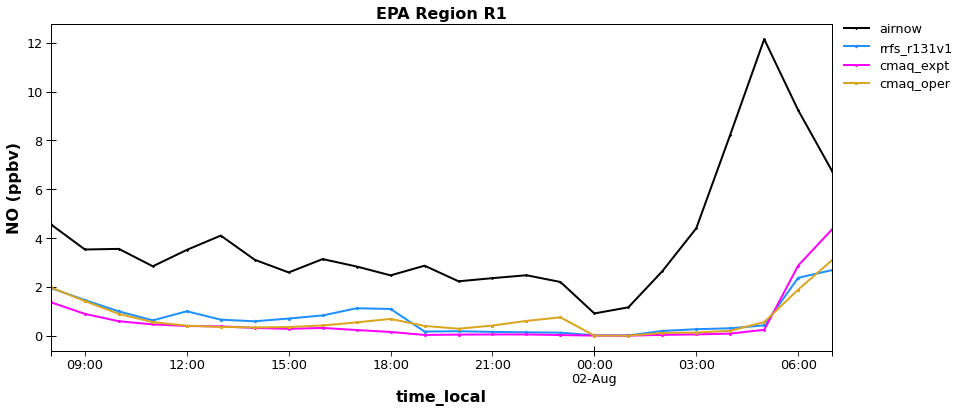

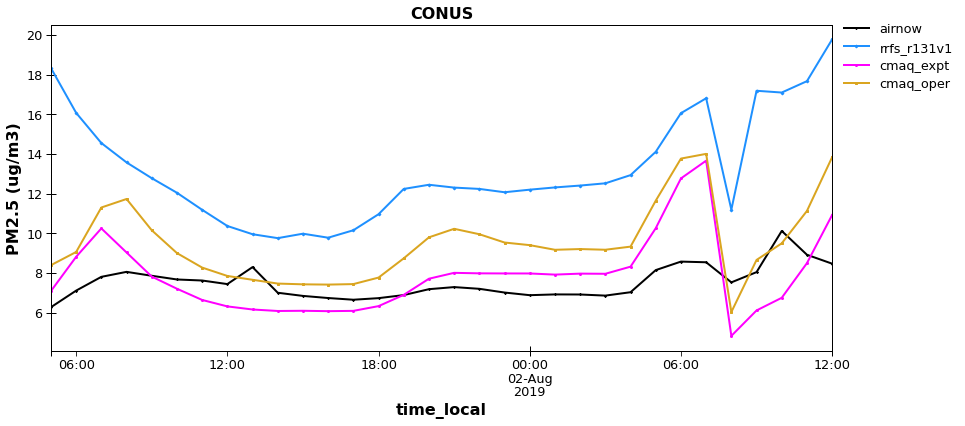

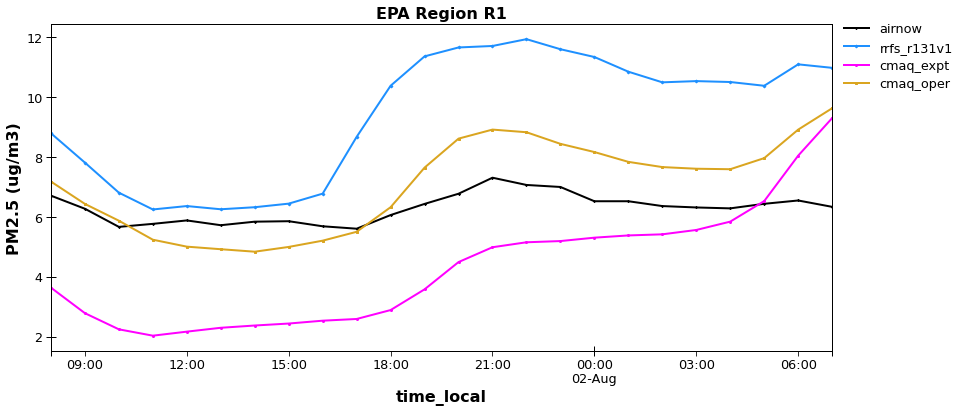

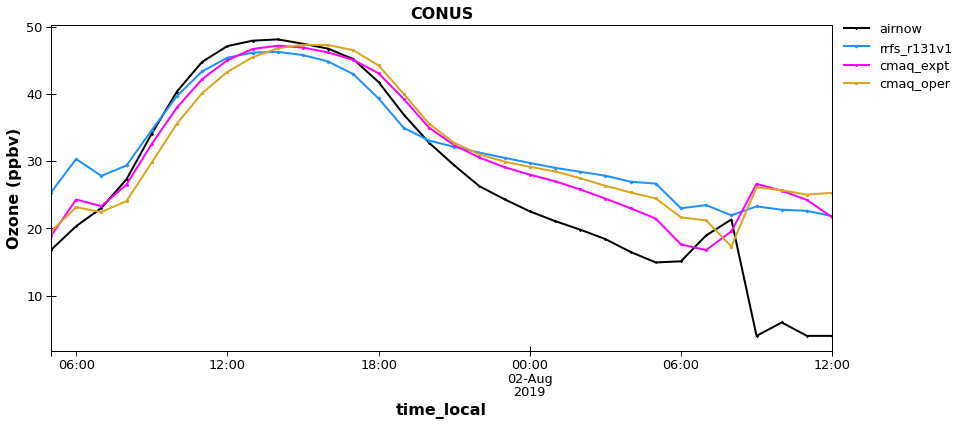

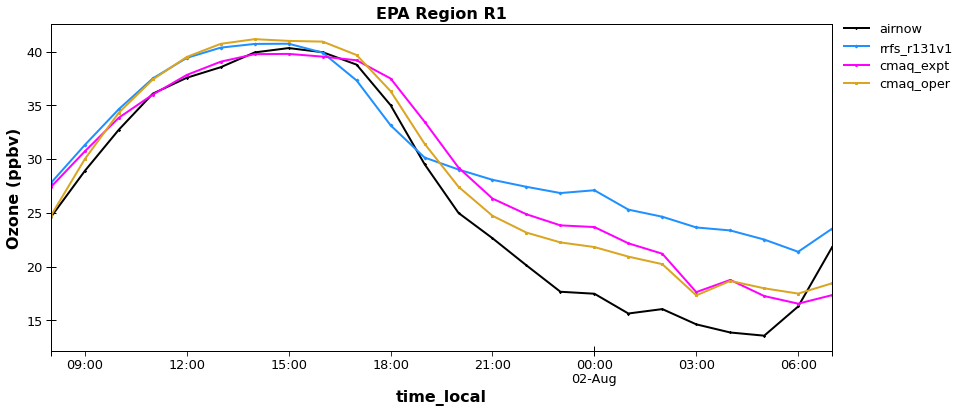

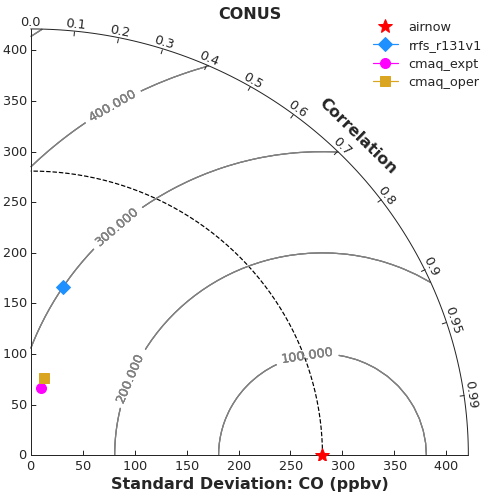

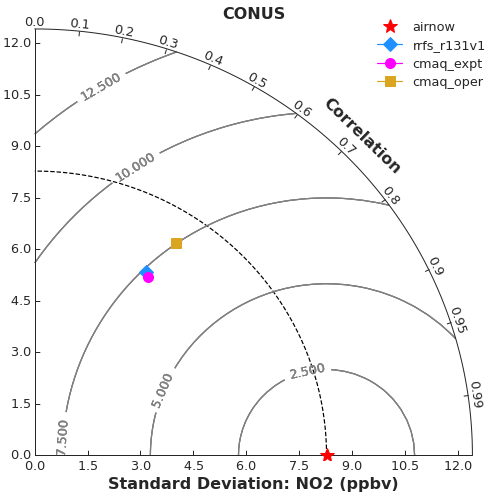

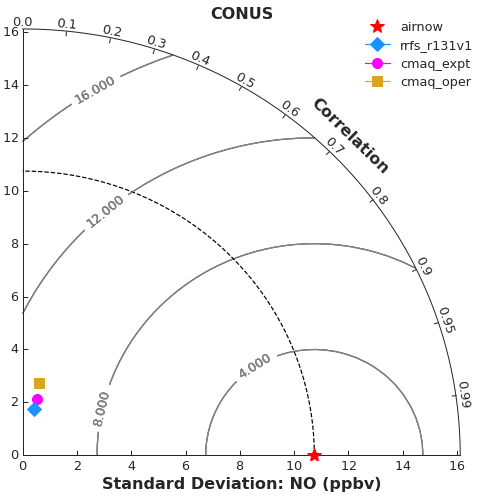

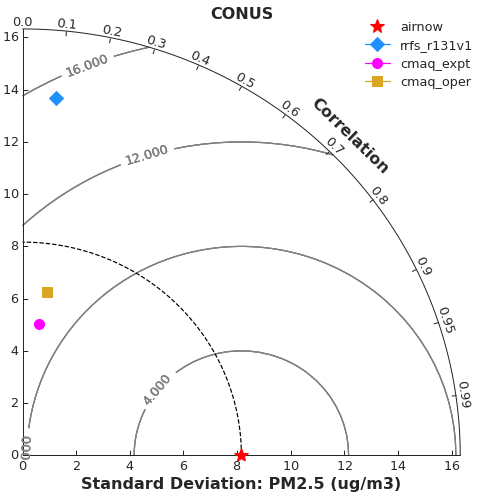

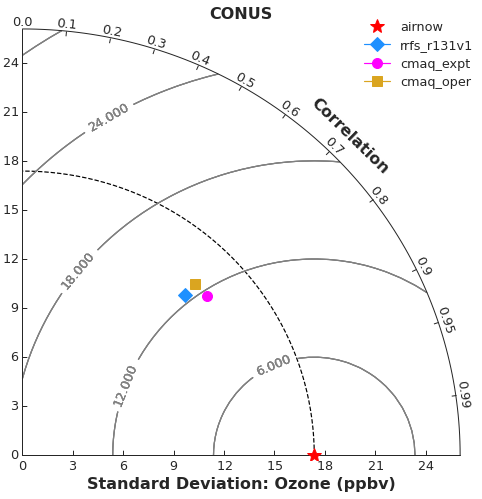

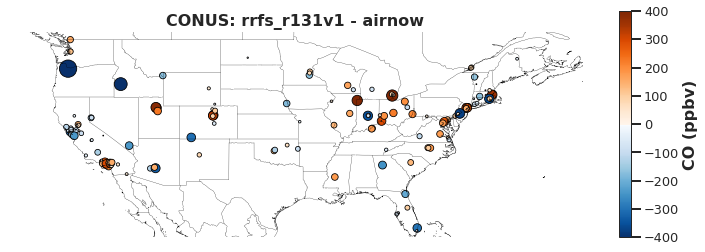

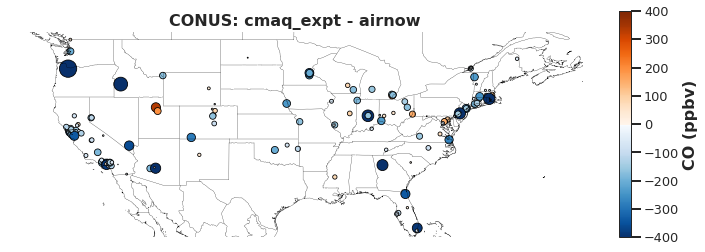

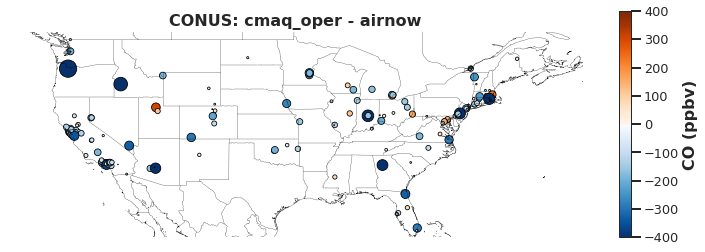

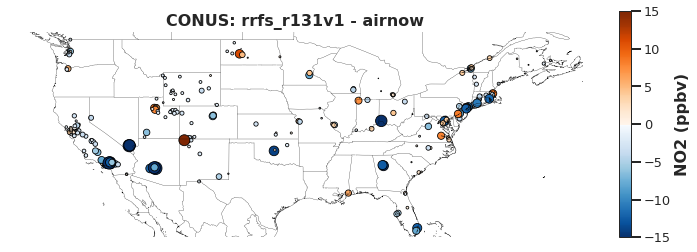

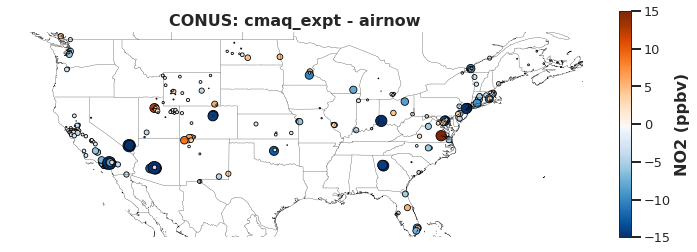

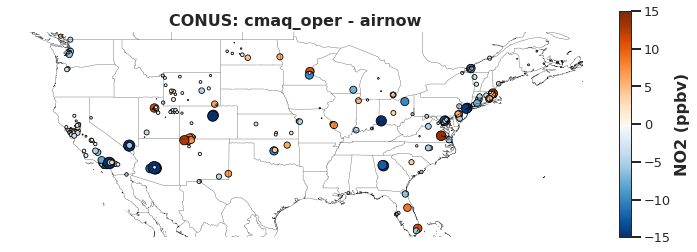

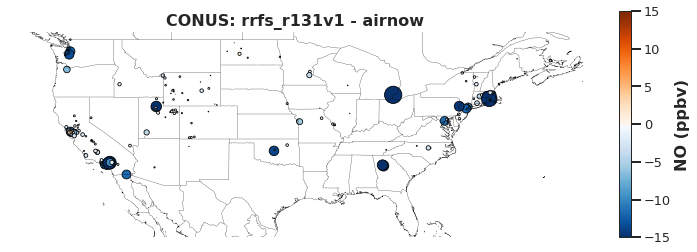

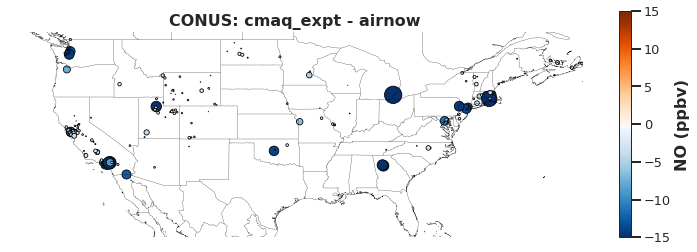

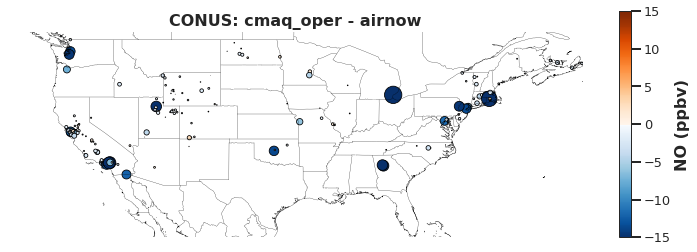

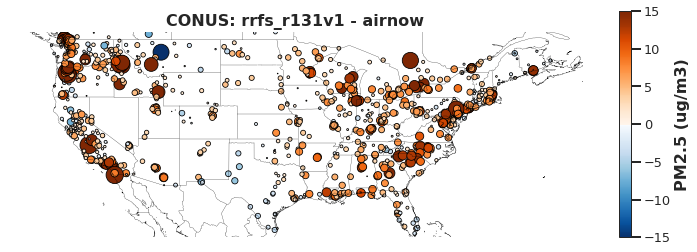

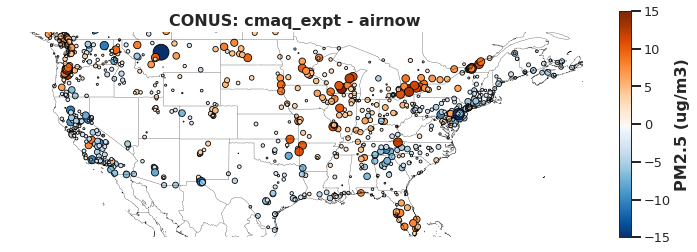

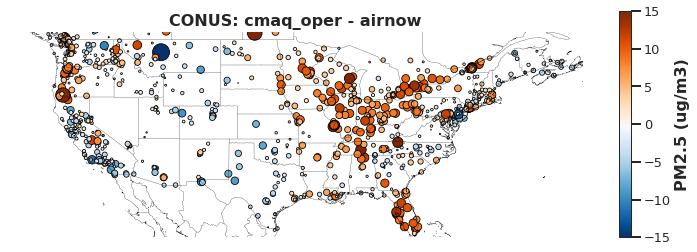

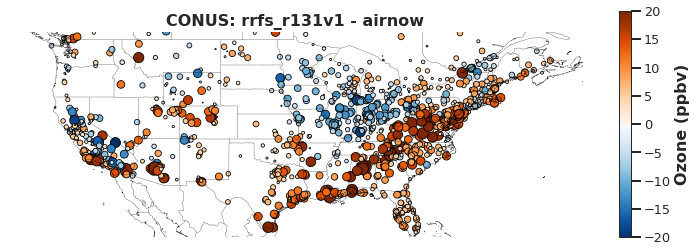

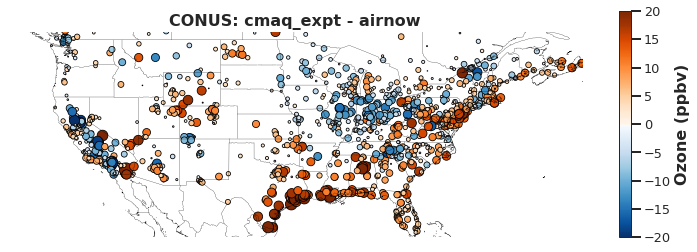

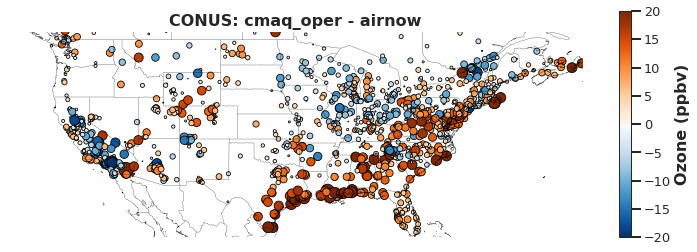

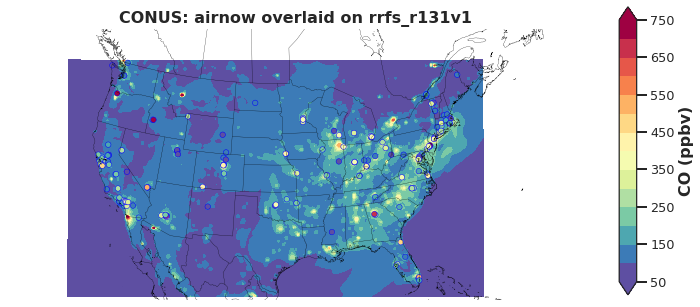

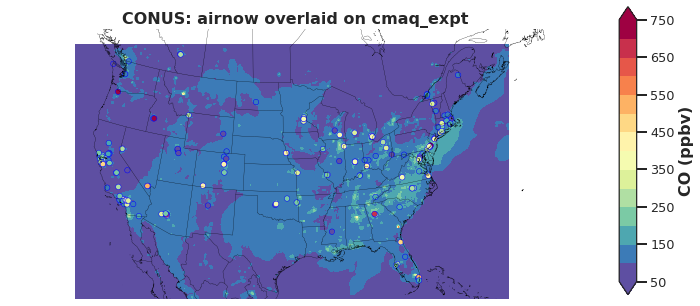

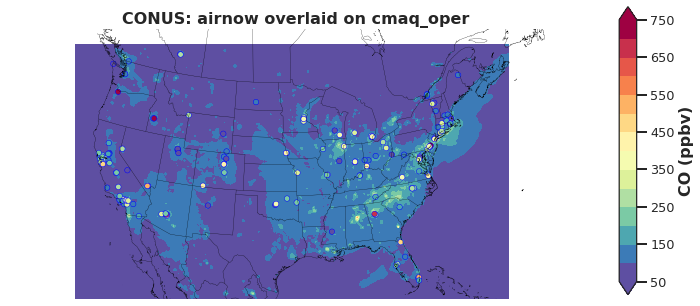

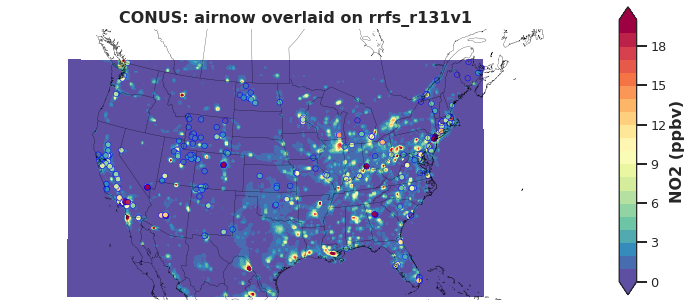

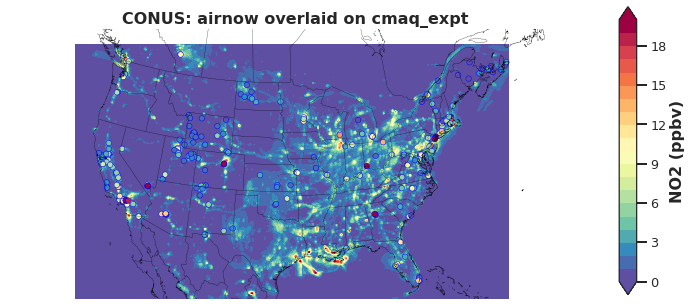

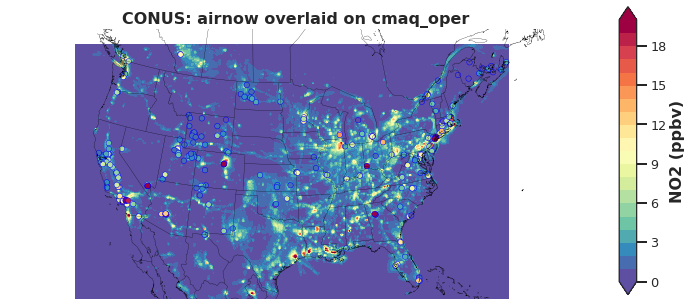

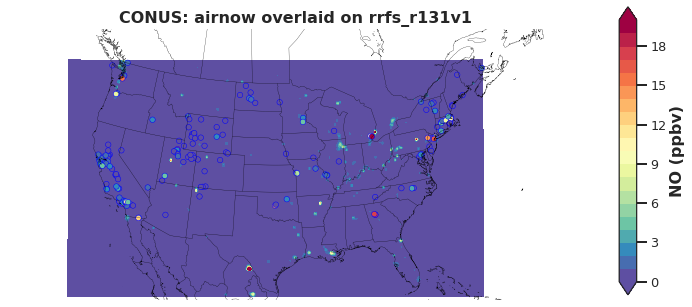

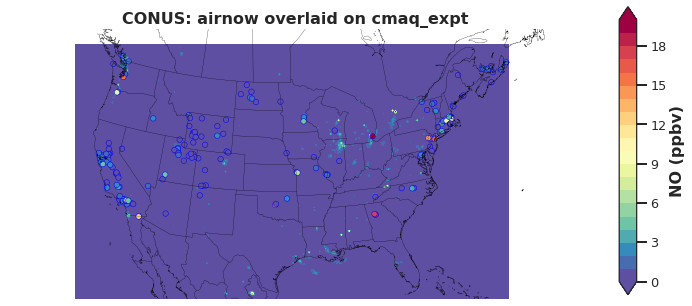

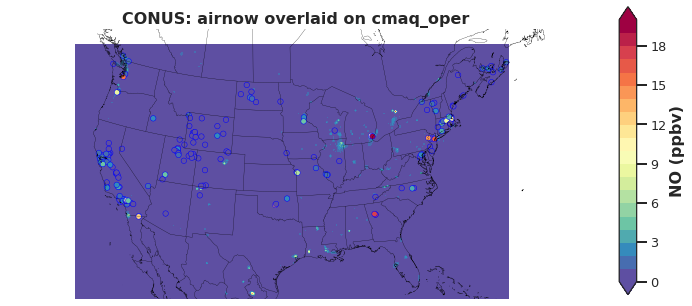

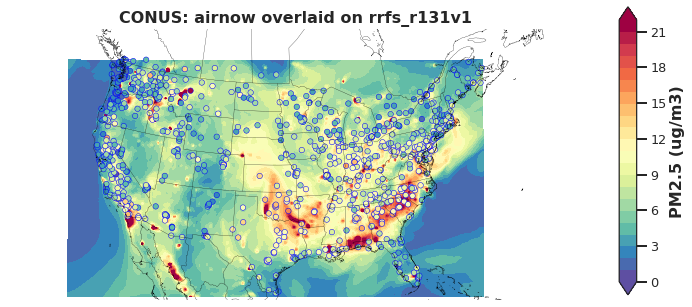

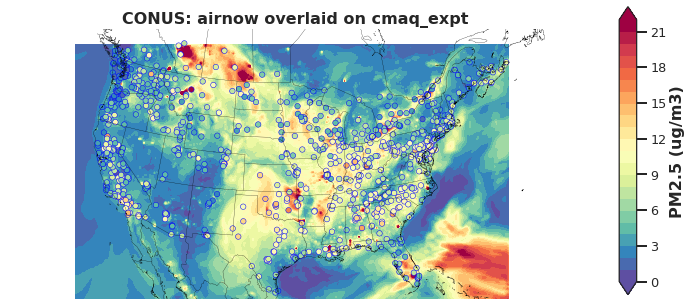

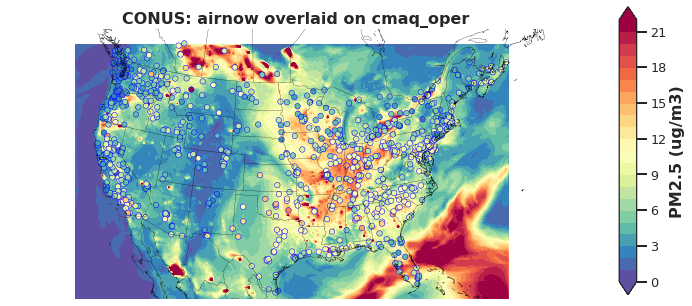

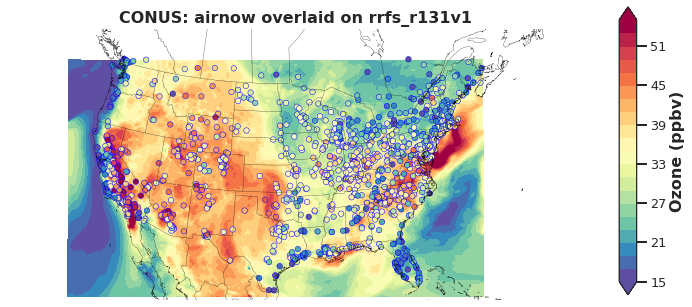

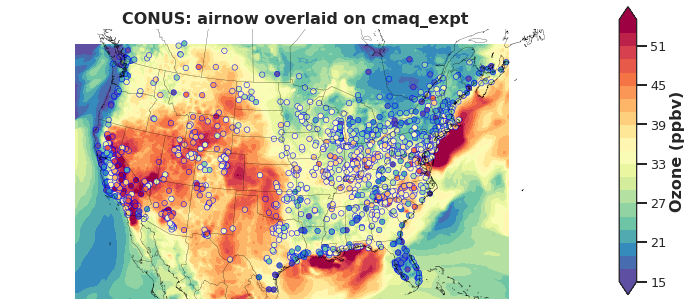

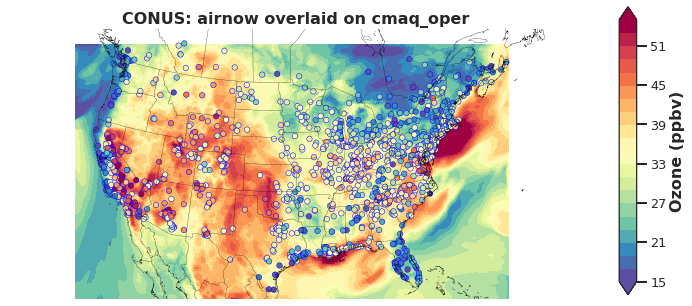

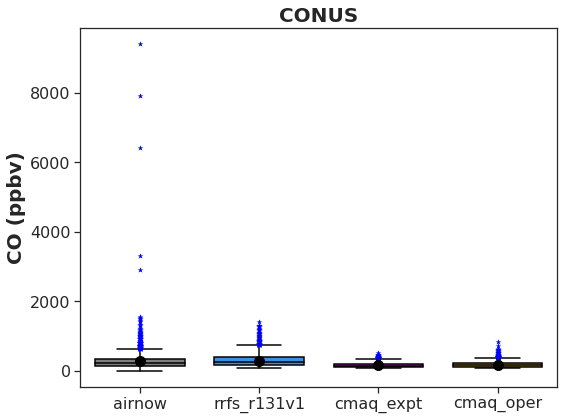

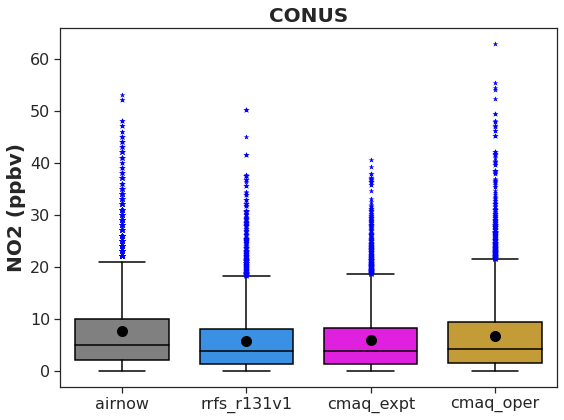

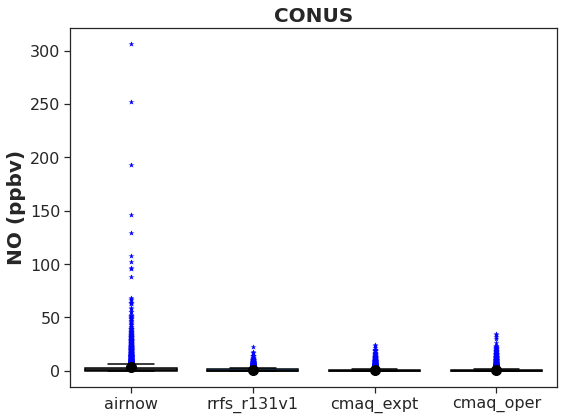

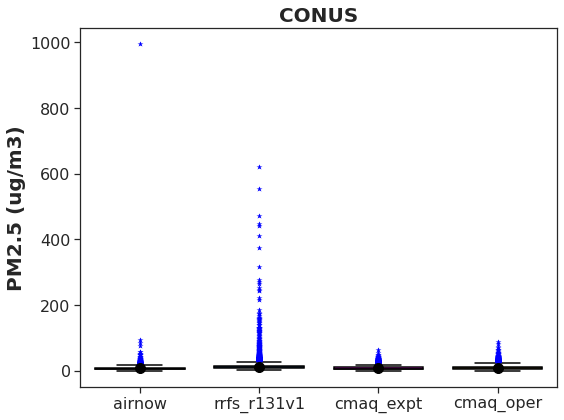

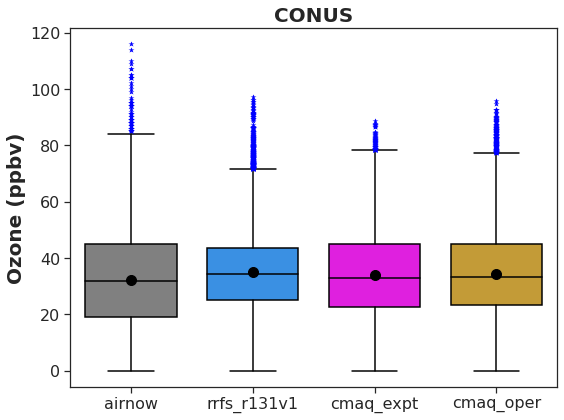

In [11]:
#And this generates all the plots.
an.plotting()

In [ ]:
#This creates the stats. This is quite slow right now.
#You are welcome to test, but it is underdevelopment.
#Don't choose too many stats at once or too long of a 
#period or the code takes a long time to run.
an.stats()